# iSnobal output visualization exploration
*J. Michelle Hu  
University of Utah  
June 2024*  
---

In [1]:
import sys
import xarray as xr
import numpy as np

from pathlib import PurePath
import pandas as pd
import hvplot.xarray
import rioxarray as riox
import matplotlib.pyplot as plt

sys.path.append('/uufs/chpc.utah.edu/common/home/u6058223/git_dirs/env/')

import helpers as h

/uufs/chpc.utah.edu/common/home/u6058223/software/pkg/miniconda3/envs/work/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Directory

In [2]:
basin = 'blue'

In [3]:
workdir = '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/'
basindir = h.fn_list(workdir, f'*{basin}*')[0]

# currently for one WY (only one per basin as of 20240618), will need to add more for WYs in the future
days = h.fn_list(basindir, "*/*/run*/")

### Specified WY 

In [4]:
# Plot for the water year of interest
WY = int(days[0].split('wy')[1].split('/')[0])

#### Forcings check
- Net SW
- LW in
- Precipitation mass
- Air temp
- Wind speed

#### For the full water year, extract these specific variables

#### For one day, plot these variables  

needs to work with un-compacted and smrf-compacted file naming

In [5]:
idx = 200
print(days[idx])
h.fn_list(days[idx], "*.nc")

/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/


['/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/cloud_factor.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/em.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/smrf_20190419.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/smrf_energy_balance_20190419.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/model_runs/blue_river_100m_isnobal/wy2019/blue_river_basin_100m/run20190419/snow.nc']

In [6]:
# plot net SW
fn = h.fn_list(days[idx], "em.nc")[0]
ds = xr.open_dataset(fn)

net_rad 0
sensible_heat 1
latent_heat 2
snow_soil 3
precip_advected 4
sum_EB 5
evaporation 6
snowmelt 7
SWI 8
cold_content 9
projection 10


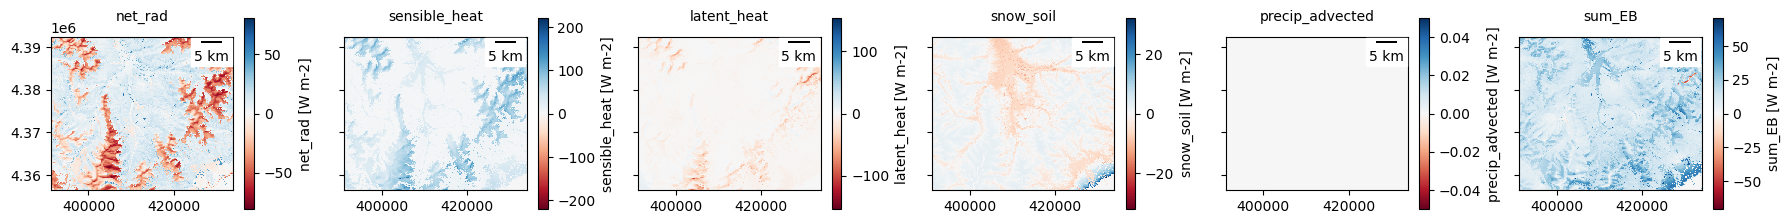

In [7]:
fig, axa = plt.subplots(1, 6, figsize=(18, 2.5), sharex=True, sharey=True)
for jdx, title in enumerate(ds.data_vars):
    print(title, jdx)
    if jdx < 6:
        ax = axa.flatten()[jdx]
        h.plot_one(np.squeeze(ds[title]), specify_ax=(fig, ax), cmap='RdBu', title=title, turnofflabels=True)
        plt.tight_layout()

In [8]:
# 24 hours
fn = h.fn_list(days[idx], "smrf_energy_balance*.nc")[0]
ds = xr.open_dataset(fn)

projection 0
albedo_ir 1
albedo_vis 2
net_solar 3


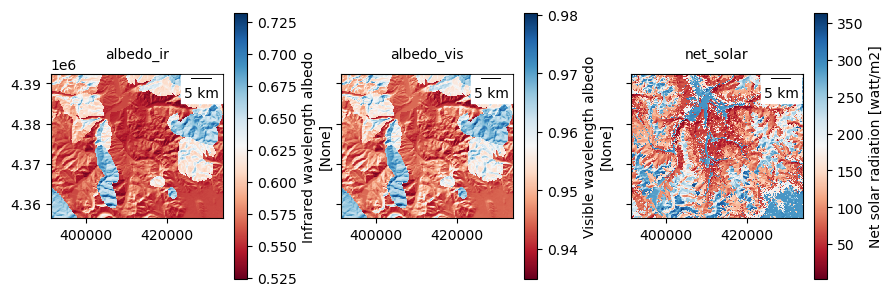

In [9]:
jtime = 18
fig, axa = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
for jdx, title in enumerate(ds.data_vars):
    print(title, jdx)
    if jdx > 0:
        ax = axa.flatten()[jdx-1]
        h.plot_one(ds[title].isel(time=jtime), specify_ax=(fig, ax), cmap='RdBu', title=title, turnofflabels=True)
        plt.tight_layout()

For the WY

#### Energy flux check
- SW
- LW --> Snow surface temperature (LW out)
- Sensible
- Latent
- Net flux

#### Mass flux check
- surface water input

In [10]:
# plot SWI
fn = h.fn_list(days[idx], "em.nc")[0]
ds = xr.open_dataset(fn)
da = np.squeeze(ds.SWI)
da

<xarray.DataArray 'SWI' (y: 360, x: 428)> Size: 616kB
[154080 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2019-04-19T22:00:00
  * y        (y) float32 1kB 4.392e+06 4.392e+06 ... 4.357e+06 4.356e+06
  * x        (x) float32 2kB 3.912e+05 3.913e+05 ... 4.338e+05 4.339e+05
Attributes:
    units:         kg or mm m-2
    description:   Total runoff
    grid_mapping:  projection

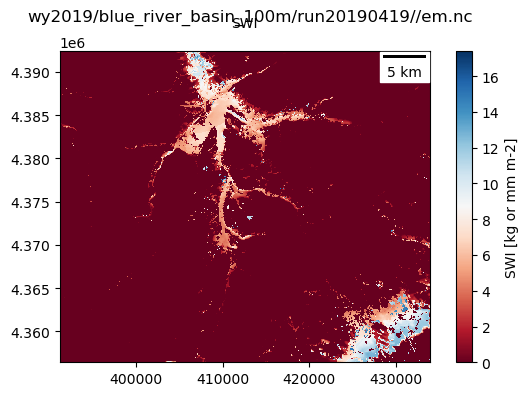

In [11]:
fig, ax = plt.subplots(1, figsize=(6, 4))
title = da.name
h.plot_one(da, specify_ax=(fig, ax), cmap='RdBu', title=title, turnofflabels=True)
plt.tight_layout()
plt.suptitle(fn.split("isnobal/")[1]);

#### State check
- snow depth
- snow density
- SWE

In [12]:
# 24 hours
fn = h.fn_list(days[idx], "snow.nc")[0]
ds = xr.open_dataset(fn)
ds

<xarray.Dataset> Size: 6MB
Dimensions:           (time: 1, y: 360, x: 428)
Coordinates:
  * time              (time) datetime64[ns] 8B 2019-04-19T22:00:00
  * y                 (y) float32 1kB 4.392e+06 4.392e+06 ... 4.356e+06
  * x                 (x) float32 2kB 3.912e+05 3.913e+05 ... 4.339e+05
Data variables:
    thickness         (time, y, x) float32 616kB ...
    snow_density      (time, y, x) float32 616kB ...
    specific_mass     (time, y, x) float32 616kB ...
    liquid_water      (time, y, x) float32 616kB ...
    temp_surf         (time, y, x) float32 616kB ...
    temp_lower        (time, y, x) float32 616kB ...
    temp_snowcover    (time, y, x) float32 616kB ...
    thickness_lower   (time, y, x) float32 616kB ...
    water_saturation  (time, y, x) float32 616kB ...
    projection        |S1 1B ...

thickness 0
snow_density 1
specific_mass 2
liquid_water 3
temp_surf 4
temp_lower 5
temp_snowcover 6
thickness_lower 7
water_saturation 8
projection 9


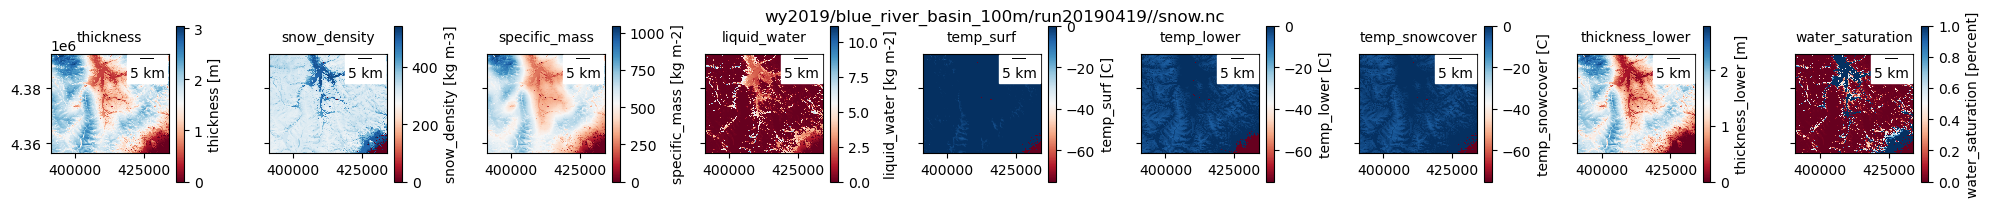

In [13]:
fig, axa = plt.subplots(1, len(ds.data_vars) - 1, figsize=(20, 2), sharex=True, sharey=True)
for jdx, title in enumerate(ds.data_vars):
    print(title, jdx)
    if jdx < len(ds.data_vars)-1:
        ax = axa.flatten()[jdx]
        h.plot_one(np.squeeze(ds[title]), specify_ax=(fig, ax), cmap='RdBu', title=title, turnofflabels=True, )
plt.tight_layout()
plt.suptitle(fn.split("isnobal/")[1]);